In [24]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [33]:
#生成数据集
dim = 2 #数据维度，特征数
num_size = 1000;
true_w = [2, -3.4] #真实权重
true_b = 4.2 #真实偏差

data_set = torch.empty(num_size,dim).uniform_(1,10) #样本特征值
print(data_set)
labels = true_w[0] * data_set[:,0] + true_w[1] * data_set[:,1] + true_b #样本标签
labels += torch.normal(0,0.01,size=(1000,))
#print(labels)

tensor([[2.6915, 3.1232],
        [1.8377, 3.4148],
        [4.2557, 5.2135],
        ...,
        [6.2519, 5.1447],
        [9.6156, 2.1830],
        [6.2493, 7.6262]])


C:\Users\cnm13\AppData\Local\Temp\ipykernel_29124\756759061.py:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') #使用矢量图


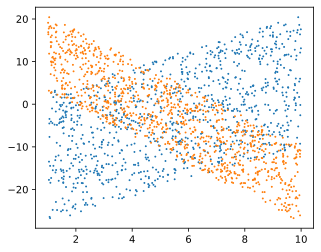

In [38]:
display.set_matplotlib_formats('svg') #使用矢量图
plt.rcParams['figure.figsize'] = (5,4)
plt.scatter(data_set[:, 0].numpy(), labels.numpy(), 1);
plt.scatter(data_set[:, 1].numpy(), labels.numpy(), 1)

In [44]:
#按批次读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features) #获取样本数量
    indices = list(range(num_examples))#生成索引表也就是[0,1,2,..]
    random.shuffle(indices) # 打乱索引表
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size,num_examples)]) # 最后⼀次可能不⾜⼀个batch
        yield features.index_select(0, j), labels.index_select(0,j)

#batch_size = 10
#for X, y in data_iter(batch_size, data_set, labels):
#    print(X, y)
#    break

tensor([[2.5111, 7.3465],
        [5.3953, 3.1550],
        [2.9854, 9.4700],
        [8.7240, 6.3850],
        [6.3112, 3.1622],
        [9.5169, 8.0939],
        [6.1704, 5.7014],
        [2.7665, 4.5522],
        [1.3200, 4.6698],
        [9.6156, 2.1830]]) tensor([-15.7531,   4.2773, -22.0298,  -0.0647,   6.0537,  -4.2904,  -2.8429,
         -5.7391,  -9.0481,  16.0167])


In [48]:
#初始化模型参数
w = 0.01 * torch.randn(dim,1,dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)
print(w.grad_fn)
print(w.requires_grad)

None
False


In [51]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [54]:
#定义模型
def linreg(X,w,b):
    return torch.mm(X,w) + b

def squared_loss(y_hat, y): # 本函数y是真实值
 # 注意这⾥返回的是向量, 另外, pytorch⾥的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这⾥更改param时⽤的param.data

In [63]:
#模型训练

lr = 0.01
num_epochs = 500
batch_size = 100
net = linreg
loss = squared_loss
for epoch in range(num_epochs): # 训练模型⼀共需要num_epochs个迭代周期
    for X, y in data_iter(batch_size, data_set, labels):
        l = loss(net(X, w, b), y).sum() # l是有关⼩批量X和y的损失
        l.backward() # ⼩批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使⽤⼩批量随机梯度下降迭代模型参数
 
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    train_l = loss(net(data_set, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.024161
epoch 2, loss 0.023659
epoch 3, loss 0.023180
epoch 4, loss 0.022747
epoch 5, loss 0.022257
epoch 6, loss 0.021793
epoch 7, loss 0.021375
epoch 8, loss 0.020914
epoch 9, loss 0.020820
epoch 10, loss 0.020272
epoch 11, loss 0.019665
epoch 12, loss 0.019264
epoch 13, loss 0.018890
epoch 14, loss 0.018746
epoch 15, loss 0.018110
epoch 16, loss 0.017821
epoch 17, loss 0.017424
epoch 18, loss 0.017146
epoch 19, loss 0.016735
epoch 20, loss 0.016387
epoch 21, loss 0.016113
epoch 22, loss 0.016825
epoch 23, loss 0.015393
epoch 24, loss 0.015057
epoch 25, loss 0.014771
epoch 26, loss 0.014457
epoch 27, loss 0.014156
epoch 28, loss 0.013900
epoch 29, loss 0.013590
epoch 30, loss 0.013482
epoch 31, loss 0.013071
epoch 32, loss 0.012811
epoch 33, loss 0.012638
epoch 34, loss 0.012324
epoch 35, loss 0.012017
epoch 36, loss 0.011811
epoch 37, loss 0.011536
epoch 38, loss 0.011335
epoch 39, loss 0.011118
epoch 40, loss 0.010848
epoch 41, loss 0.010662
epoch 42, loss 0.010548
e

In [65]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0004],
        [-3.3995]], requires_grad=True)
4.2 
 tensor([4.1956], requires_grad=True)
